# Module G: Section 21.4, 21.5

In [1]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

2. Write a function my_poly_int(x,y), where x and y are one-dimensional arrays of the same size, and the elements of x are unique and in ascending order. The function my_poly_int should (1) compute the Lagrange polynomial going through all the points defined by x and y and (2) return an approximation to the area under the curve defined by x and y, I, defined as the analytic integral of the Lagrange interpolating polynomial.

In [2]:
def my_poly_int(x: np.array, y: np.array) -> float:
    """
    Integrate a function defined by x and y.

    :param x: Array of x values
    :param y: Array of y values
    :return: Approximation of the integral
    """

    # Define X
    X = np.linspace(x[0], x[-1], len(x)*10)

    # Calculate the Lagrange polynomial
    # Initialize output array with zeros of same shape as X
    Y = np.zeros(len(X))

    numer_func = lambda x_val, x_j: x_val - x_j
    denom_func = lambda x_i, x_j: x_i - x_j

    # Iterate through each X to Interp
    for _X_i, _X in enumerate(X):
        _Y = 0

        # Calculate each polynomial (Pi)
        for i, _x_i in enumerate(x):
            # Initialize P_i
            P_i = 1

            # Get y value for x
            y_i = y[i]

            # Iterate through each x data
            for j, _x_j in enumerate(x):
                if j != i:
                    P_i = P_i * (numer_func(_X, _x_j)) / (denom_func(_x_i, _x_j))

            # Iterate L(x) step
            _Y += y_i * P_i

        # Add to Y
        Y[_X_i] = _Y

    # Calculate the area under the curve
    return integrate.simps(Y, X)

In [3]:
# Test my_poly_int
# y = x**2
_x_test = np.array([0, 1, 3, 4, 5, 6, 8, 9])
_y_test = np.array([0, 1, 9, 16, 25, 36, 64, 81])

_f_int = my_poly_int(_x_test, _y_test)
print("Computed: ", _f_int)
print("Expected: ", 243.0)


print("\n")

# y = x**3 - x**2 + x
_x_test = np.array([0, 1, 3, 4, 5, 6, 8, 9])
_y_test = _x_test**3 - _x_test**2 + _x_test

_f_int = my_poly_int(_x_test, _y_test)
print("Computed: ", _f_int)
print("Expected: ", 1437.75)

Computed:  243.0002464308097
Expected:  243.0


Computed:  1437.7530803851216
Expected:  1437.75


4. Write a function my_fourier_coef(f,n), with output [An,Bn], where f is an function object that is 2π-periodic. The function my_fourier_coef should compute the n-th Fourier coefficients, An and Bn, in the Fourier series for f defined by the two formulas given earlier. You should use the quad function to perform the integration.

In [4]:
def my_fourier_coef(f: callable,n: int):
    """
    Fourier Approximation of a function f.

    :param f: Function to approximate
    :param n: Order of the approximation
    """

    an = 1/np.pi * integrate.quad(lambda x: f(x) * np.cos(n*x), -np.pi, np.pi)[0]
    bn = 1/np.pi * integrate.quad(lambda x: f(x) * np.sin(n*x), -np.pi, np.pi)[0]


    return np.array([an, bn])

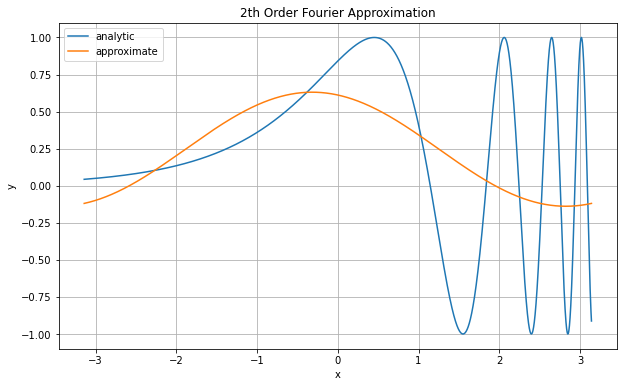

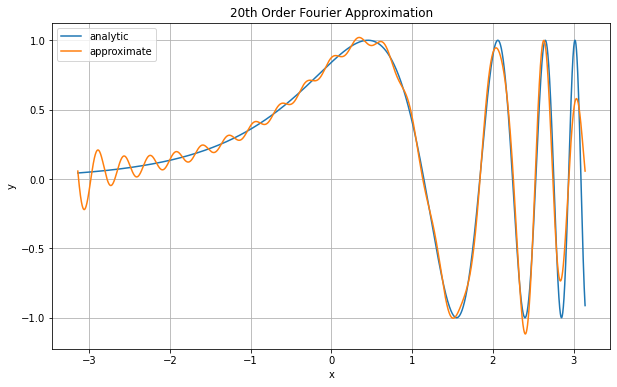

In [5]:
def plot_results(f, N):
    x = np.linspace(-np.pi, np.pi, 10000)

    [A0, B0] = my_fourier_coef(f, 0)

    y = A0*np.ones(len(x))/2
    for n in range(1, N):
        [An, Bn] = my_fourier_coef(f, n)
        y += An*np.cos(n*x)+Bn*np.sin(n*x)

    plt.figure(figsize = (10,6))
    plt.plot(x, f(x), label = 'analytic')
    plt.plot(x, y, label = 'approximate')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid()
    plt.legend()
    plt.title(f'{N}th Order Fourier Approximation')
    plt.show()

_f_test = lambda x: np.sin(np.exp(x))

# 2nd Order
_N_test = 2
plot_results(_f_test, _N_test)

# 20th Order
_N_test = 20
plot_results(_f_test, _N_test)